In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/creditcard.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

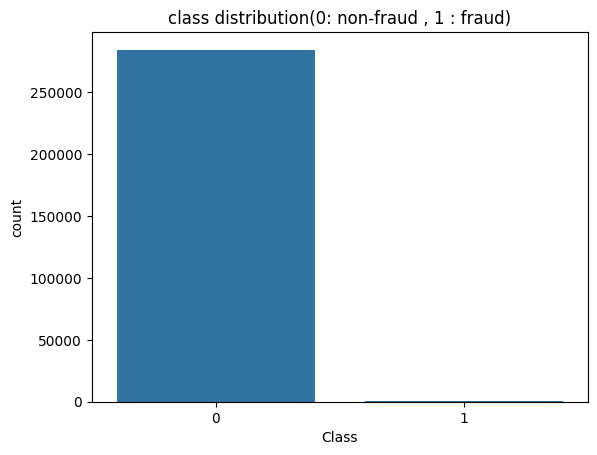

,,count
Class,anomaly,
0,0,284126
1,0,396
0,1,189
1,1,96


In [14]:
#task1
#Anomaly Detection
sns.countplot(x='Class',data=df)
plt.title('class distribution(0: non-fraud , 1 : fraud)')
plt.show()
# using isolation forest for anomaly detection
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.001)
anomaly_labels = isolation_forest.fit_predict(df.drop(['Class'],axis=1))
df['anomaly'] = (anomaly_labels == -1).astype(int)
df[['Class','anomaly']].value_counts()

In [15]:
#feature Engineering
#feature scaling
scaler = StandardScaler()
df['scaled_Amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_Time'] = scaler.fit_transform(df[['Time']])
#droping original columns
df = df.drop(['Time','Amount'],axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,anomaly,scaled_Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,-0.073403,-1.996541


In [16]:
#ML models
x = df.drop(['Class', 'anomaly'] , axis=1)
y = df['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify=y)

#logistic Regression
logistic_regression = LogisticRegression(max_iter = 1000,class_weight='balanced')
logistic_regression.fit(x_train,y_train)
y_pred_logistic = logistic_regression.predict(x_test)
print("logistic regression")
print(classification_report(y_test,y_pred_logistic))

logistic regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [18]:
#Decision tree
decision_tree = DecisionTreeClassifier(max_depth=5,class_weight = 'balanced')
decision_tree.fit(x_train,y_train)
y_prediction= decision_tree.predict(x_test)
print("decision tree")
print(classification_report(y_test,y_prediction))


decision tree
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [22]:
#Random forest
random_forest = RandomForestClassifier(n_estimators = 100,random_state = 42,class_weight = 'balanced')
random_forest.fit(x_train,y_train)
y_prediction = random_forest.predict(x_test)
print("random forest :")
print(classification_report(y_test,y_prediction))


random forest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
#checking wether the model is fitted or not because it came 100 accuracy
print("is fitted:" , hasattr(random_forest,"estimators_"))
print("number of trees:", len(getattr(random_forest,"estimators_",[])))

is fitted: True
number of trees: 100


In [52]:
#correcting shapes and checking missing values
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("any NaNs in x_train" , x_train.isnull().any().any())
print("any NaNs in y_train", y_train.isnull().any())
print("unique y_train values" , set(y_train))

x_train shape (227845, 30)
y_train shape (227845,)
any NaNs in x_train False
any NaNs in y_train False
unique y_train values {0, 1}


In [57]:
#checking how many trees are fitted
random_forest = RandomForestClassifier(n_estimators =100,random_state=42,class_weight = 'balanced')
random_forest.fit(x_train,y_train)
print("number of trees after fitting:" , len(getattr(random_forest, "estimators_",[])))

number of trees after fitting: 100


In [56]:
#real-time monitoring
import time
sample = x_test.sample(20,random_state =1)
for i , row in sample.iterrows():
  row_dataframe = row.to_frame().T
  prediction = random_forest.predict(row_dataframe)[0]
  print(f'transaction {i}: fraud' if prediction == 1 else f'transaction {i} : not a fraud')
  time.sleep(0.5)

transaction 100737 : not a fraud
transaction 12147 : not a fraud
transaction 218237 : not a fraud
transaction 222554 : not a fraud
transaction 199457 : not a fraud
transaction 184599 : not a fraud
transaction 168177 : not a fraud
transaction 197852 : not a fraud
transaction 189372 : not a fraud
transaction 262726 : not a fraud
transaction 84398 : not a fraud
transaction 8768 : not a fraud
transaction 18858 : not a fraud
transaction 24914 : not a fraud
transaction 136905 : not a fraud
transaction 118163 : not a fraud
transaction 115579 : not a fraud
transaction 4488 : not a fraud
transaction 55307 : not a fraud
transaction 40211 : not a fraud


In [61]:
!pip install dask

In [63]:
!pip install dask-ml --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 21.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rapids-dask-dependency 25.2.0 requires dask==2024.12.1, but you have dask 2025.5.1 which is incompatible.
rapids-dask-dependency 25.2.0 requires distributed==2024.12.1, but you have distributed 2025.5.1 which is incompatible.
dask-expr 1.1.21 requires dask==2024.12.1, but you have dask 2025.5.1 which is incompatible.


In [65]:
!pip install --upgrade dask distributed --quiet


In [8]:
import dask.dataframe as dd
df = dd.read_csv('/content/creditcard.csv' , dtype ={'Time' : 'float64'})
df = df.drop(columns=['Time']).compute()
#spliting features
x= df.drop(columns=['Class'])
y=df['Class']
sclaer = StandardScaler()
x_scaled =scaler.fit_transform(x)
#random forest
random_forest = RandomForestClassifier(n_estimators =100, class_weight = 'balanced',n_jobs= -1,random_state = 42)
random_forest.fit(x_train,y_train)
y_prediction = random_forest.predict(x_test)
print("scalable fraud detection:")
print(classification_report(y_test,y_prediction,digits = 4))

scalable fraud detection:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962

